# SVC TITANIC

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [21]:
titanic = pd.read_csv("titanic.csv")
print(titanic.head())
df = titanic[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].copy()
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].fillna("S")
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)
df["Age"] = df["Age"].fillna(df["Age"].median())
X = df.drop("Survived", axis=1)
y = df["Survived"]

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


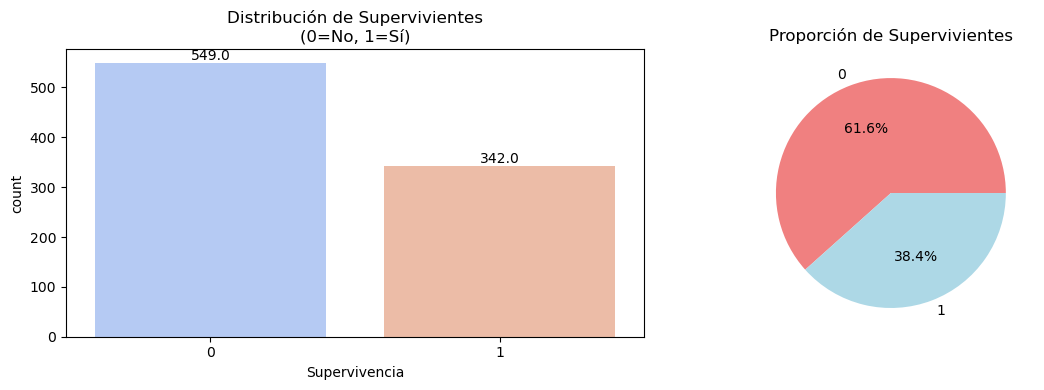

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Survived', hue='Survived', palette='coolwarm', legend=False)
plt.title('Distribución de Supervivientes\n(0=No, 1=Sí)')
plt.xlabel('Supervivencia')

# Añadir valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.subplot(1, 2, 2)
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Proporción de Supervivientes')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))])
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Reporte de clasificación: \n{classification_report(y_test, y_pred, zero_division=0)}")

Accuracy: 81.01%
Precisión: 82.00%
F1-score: 78.69%
Recall: 77.52%
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.84      0.62      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179



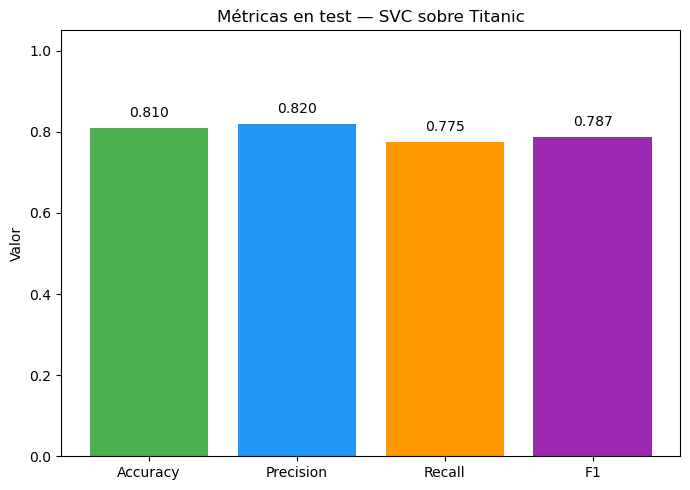

In [45]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals, color=["#4caf50", "#2196f3", "#ff9800", "#9c27b0"])
plt.ylim(0, 1.05)
plt.title("Métricas en test — SVC sobre Titanic")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

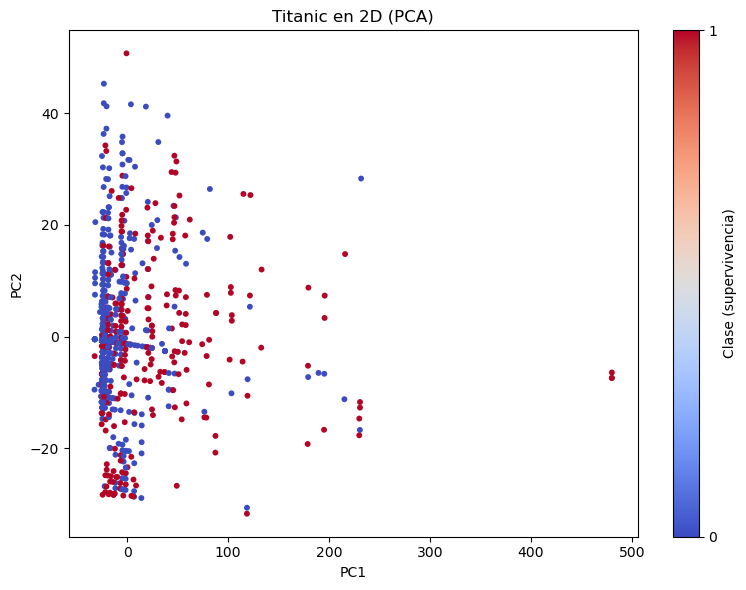

In [46]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", s=18, edgecolor="none")
plt.title("Titanic en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_label("Clase (supervivencia)")
plt.tight_layout()
plt.show()

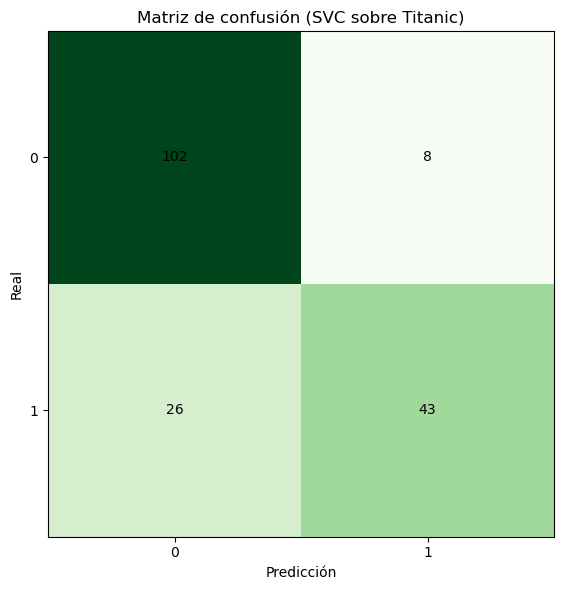

In [47]:
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap="Greens", interpolation="nearest")
plt.title("Matriz de confusión (SVC sobre Titanic)")
plt.xticks(ticks=range(2), labels=range(2))
plt.yticks(ticks=range(2), labels=range(2))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

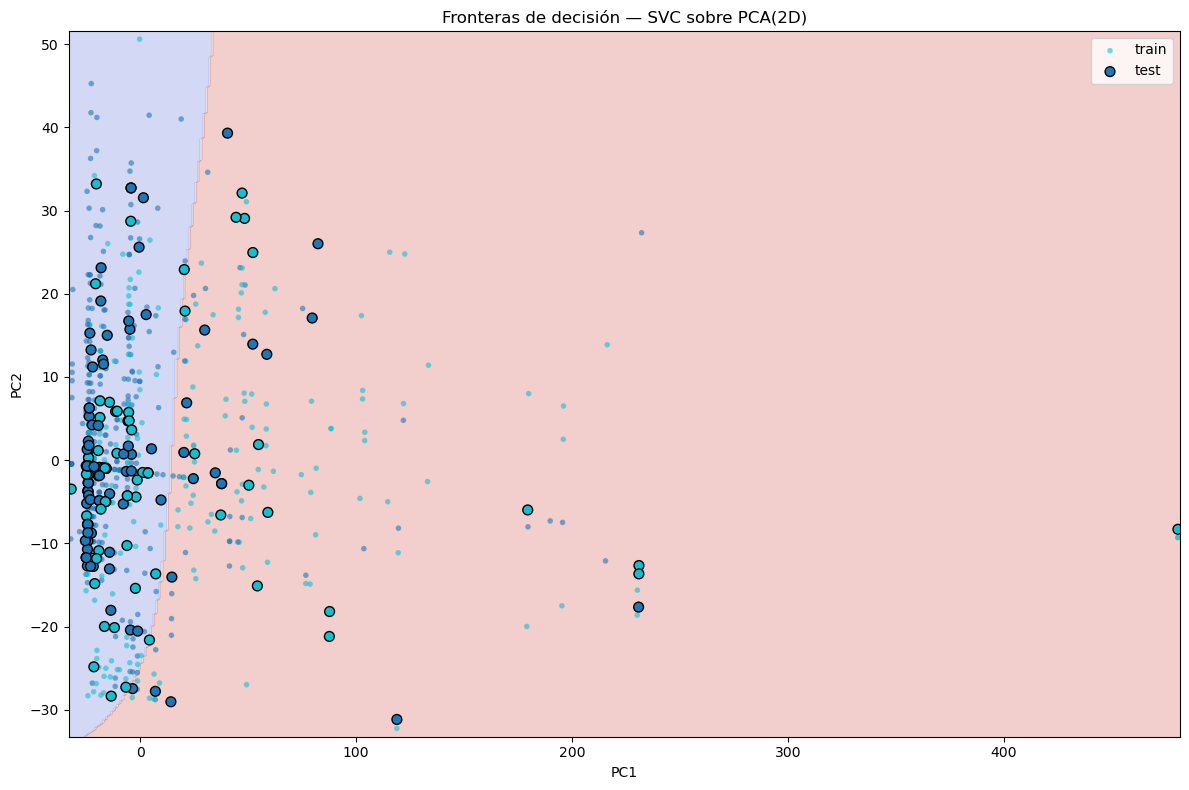

In [ ]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

svc2_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svc2_model.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = svc2_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="coolwarm")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=16, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — SVC sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()